In [22]:
import xarray
import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt  # plotting library

# Issue: Maybe downgrade shapely pip install shapely==1.8.5
import cartopy.crs as ccrs  # Projections list
import cartopy.feature as cfeature # for coastlines

# Compare gmb and amb data

In [2]:
# costg is until 2023
costg = xarray.open_dataset(
    "/home/kim/grace_convNP/data/GRACE_COST-G/GRAVIS-3_2002095-2023334_COSTG_0100_AIS_GRID_TUD_0003.nc")

In [3]:
aus = xarray.open_dataset(
    "data/GRAVIS-3_2002095-2021090_COSTG_0100_AIS_GRID_TUD_0002_withtrends.nc")

In [7]:
costg.dm.values.shape

(227, 97, 117)

In [13]:
aus.dm.values.shape

(195, 97, 117)

In [15]:
difference = aus.dm.values - costg.dm.values[0:195, :, :]

In [20]:
# 811 max diff
np.nanmax(difference)

811.6000000000001

In [ ]:
costg.dm.values[0:195, :, :]

In [23]:
cvals  = [0., 0.15, 0.3, 0.45, 0.5, 1.]
colors = ["#371229", "#B6222B", "#FF8E35", "#FCDC79", "white", "#62C3DB"]

norm = plt.Normalize(np.min(cvals), np.max(cvals))
tuples = list(zip(map(norm, cvals), colors))
nasa_cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

In [27]:
i = 194

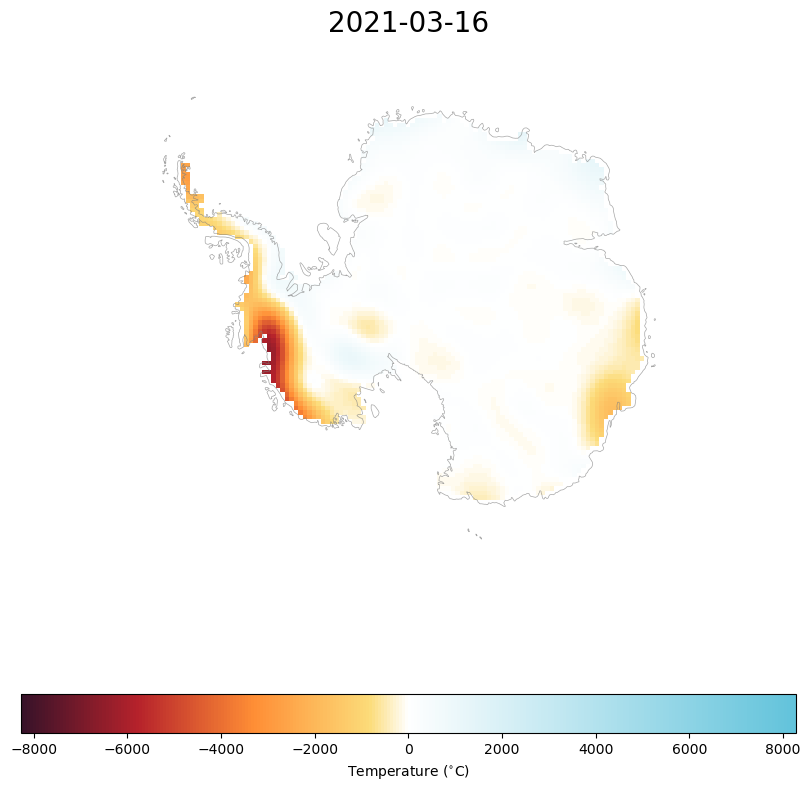

In [28]:
nasa_cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

fig = plt.figure(figsize = [10, 10])
ax = plt.axes(projection = ccrs.SouthPolarStereo())

# define bounds
ax.set_extent([-3e6, 3e6, -3e6, 3e6], ccrs.SouthPolarStereo())

# hides boundry line
ax.axis('off')

special_color = 'grey'

# thin coastline lines
ax.add_feature(cfeature.COASTLINE, 
               edgecolor = special_color, 
               linestyle = '-', 
               linewidth = 0.5, 
               alpha = 0.7)

# ax.stock_img()

costg.dm[i].plot(ax = ax, 
        transform = ccrs.SouthPolarStereo(), 
        vmin = np.nanmin(costg.dm.values), 
        # define max as negative min to keep 0 white
        vmax = -np.nanmin(costg.dm.values),
        # cmap = 'bwr_r',
        cmap = nasa_cmap,
        # remove colorbar
        add_colorbar = True,
        cbar_kwargs = dict(orientation = 'horizontal',
                      pad = 0.15, shrink = 1, label = 'Temperature ($^{\circ}$C)')) 

plt.title(str(costg.dm[i].time)[36:46], size = 20)

plt.show()

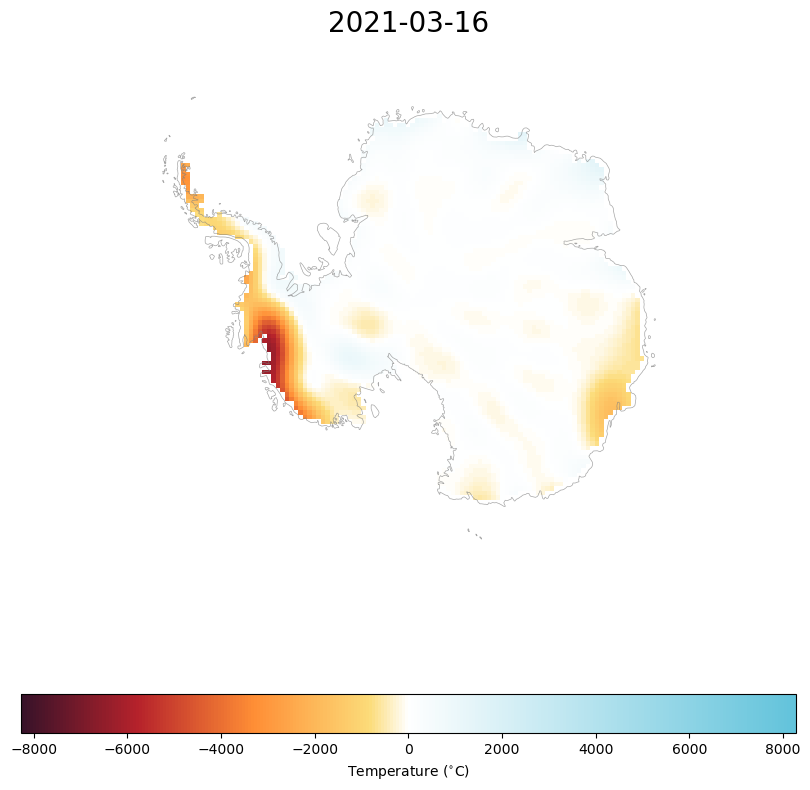

In [29]:
nasa_cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

fig = plt.figure(figsize = [10, 10])
ax = plt.axes(projection = ccrs.SouthPolarStereo())

# define bounds
ax.set_extent([-3e6, 3e6, -3e6, 3e6], ccrs.SouthPolarStereo())

# hides boundry line
ax.axis('off')

special_color = 'grey'

# thin coastline lines
ax.add_feature(cfeature.COASTLINE, 
               edgecolor = special_color, 
               linestyle = '-', 
               linewidth = 0.5, 
               alpha = 0.7)

# ax.stock_img()

aus.dm[i].plot(ax = ax, 
        transform = ccrs.SouthPolarStereo(), 
        vmin = np.nanmin(costg.dm.values), 
        # define max as negative min to keep 0 white
        vmax = -np.nanmin(costg.dm.values),
        # cmap = 'bwr_r',
        cmap = nasa_cmap,
        # remove colorbar
        add_colorbar = True,
        cbar_kwargs = dict(orientation = 'horizontal',
                      pad = 0.15, shrink = 1, label = 'Temperature ($^{\circ}$C)')) 

plt.title(str(costg.dm[i].time)[36:46], size = 20)

plt.show()